# Plant Diseases

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

---

## Corn

### Load Data

In [2]:
train_dir = 'Corn/train'
test_dir = 'Corn/test'

In [3]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical', subset='training')
valid_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical', subset='validation')

Found 5855 images belonging to 4 classes.
Found 1461 images belonging to 4 classes.


In [4]:
train_data.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

In [5]:
class_name = ['Gray Leaf Spot', 'Common Rust', 'Northern Leaf Blight', 'Healthy']

### Explorative Data Analysis

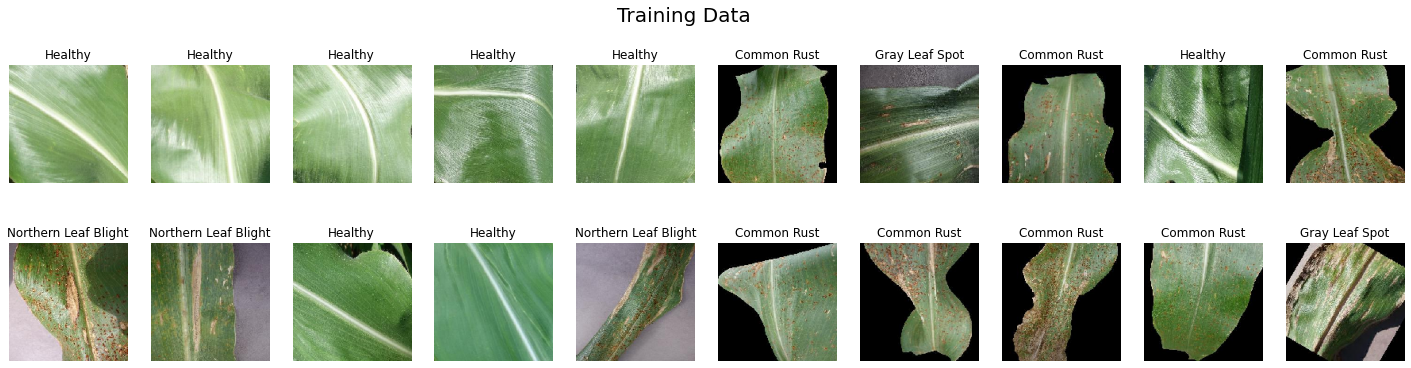

In [6]:
plt.figure(figsize=(25, 6))
plt.suptitle('Training Data', fontsize=20)
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(train_data[i][0][0])
    plt.title(class_name[np.argmax(train_data[i][1][0])])
    plt.axis('off')
plt.show()

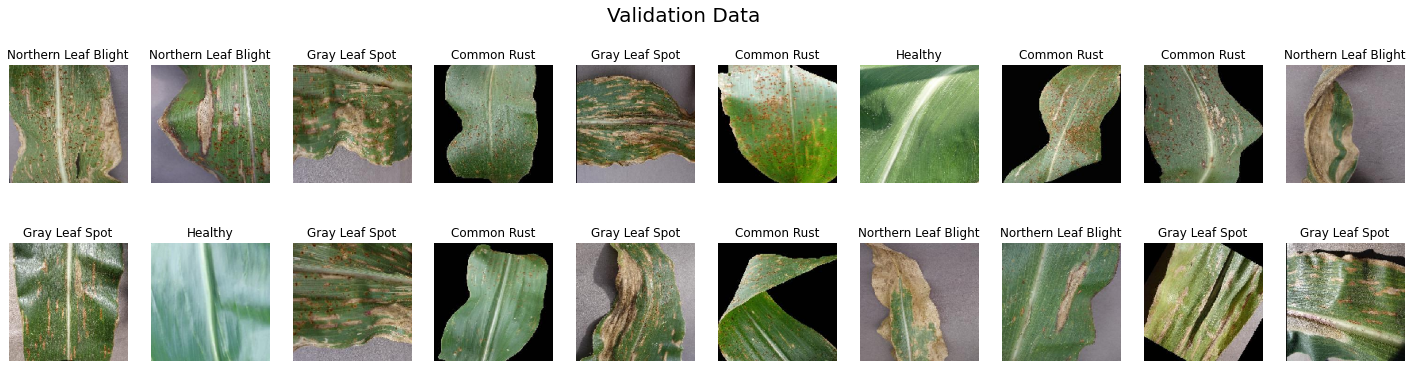

In [7]:
plt.figure(figsize=(25, 6))
plt.suptitle('Validation Data', fontsize=20)
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(valid_data[i][0][0])
    plt.title(class_name[np.argmax(valid_data[i][1][0])])
    plt.axis('off')
plt.show()

### Modeling

In [8]:
model = Sequential()
# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

# # Fully Connected Layer 1
# model.add(Dense(64, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(4, activation='softmax'))

In [9]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True), keras.callbacks.ModelCheckpoint('corn_model.h5', monitor='val_loss', save_best_only=True)]

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=valid_data, epochs=10, callbacks=callback)

Epoch 1/10
293/293 [==============================] - 86s 293ms/step - loss: 1.0349 - accuracy: 0.8775 - val_loss: 8.8183 - val_accuracy: 0.2717
Epoch 2/10
293/293 [==============================] - 84s 287ms/step - loss: 0.4707 - accuracy: 0.9334 - val_loss: 0.4356 - val_accuracy: 0.9179
Epoch 3/10
293/293 [==============================] - 84s 287ms/step - loss: 0.3506 - accuracy: 0.9445 - val_loss: 1.5116 - val_accuracy: 0.8220
Epoch 4/10
293/293 [==============================] - 84s 287ms/step - loss: 0.2579 - accuracy: 0.9525 - val_loss: 0.1427 - val_accuracy: 0.9624
Epoch 5/10
293/293 [==============================] - 84s 286ms/step - loss: 0.2589 - accuracy: 0.9541 - val_loss: 0.7257 - val_accuracy: 0.8727
Epoch 6/10
293/293 [==============================] - 84s 286ms/step - loss: 0.1853 - accuracy: 0.9667 - val_loss: 0.5130 - val_accuracy: 0.9521


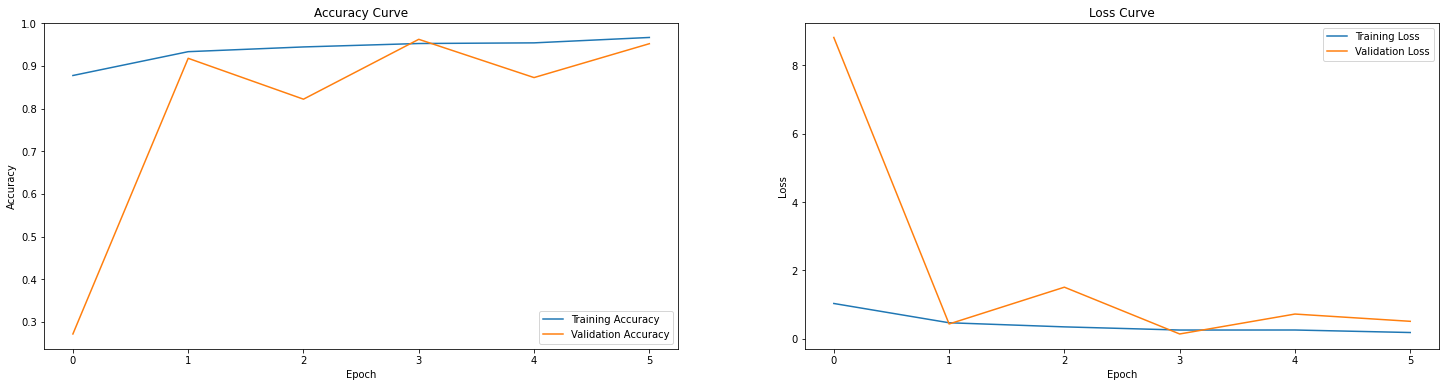

In [11]:
metrics = pd.DataFrame(history.history)

plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Training Accuracy')
plt.plot(metrics.val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Training Loss')
plt.plot(metrics.val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing

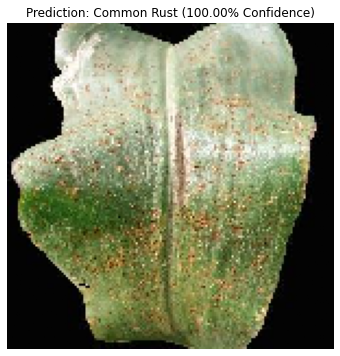

In [12]:
plt.figure(figsize=(25, 6))
img1 = tf.keras.preprocessing.image.load_img('RS_Rust 1585.JPG', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255
pred = model.predict(np.expand_dims(img1, axis=0))
plt.imshow(img1)
plt.axis('off')
plt.title(f"Prediction: {class_name[np.argmax(pred)]} ({np.max(pred) * 100:.2f}% Confidence)")
plt.show()

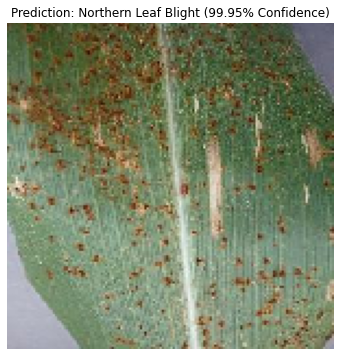

In [13]:
plt.figure(figsize=(25, 6))
img1 = tf.keras.preprocessing.image.load_img('0e0ed08d-3021-49a7-9098-7c90afeb2fd5___RS_GLSp 4346.JPG', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255
pred = model.predict(np.expand_dims(img1, axis=0))
plt.imshow(img1)
plt.axis('off')
plt.title(f"Prediction: {class_name[np.argmax(pred)]} ({np.max(pred) * 100:.2f}% Confidence)")
plt.show()

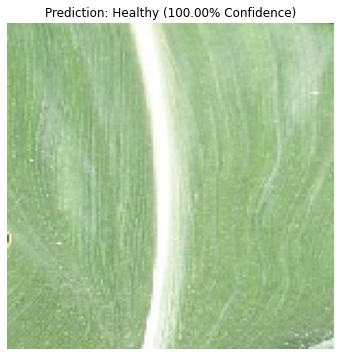

In [14]:
plt.figure(figsize=(25, 6))
img1 = tf.keras.preprocessing.image.load_img('0f735e65-a30d-47b3-bf2f-d857a8e5a7d7___R.S_HL 8042 copy 2_flipLR.jpg', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255
pred = model.predict(np.expand_dims(img1, axis=0))
plt.imshow(img1)
plt.axis('off')
plt.title(f"Prediction: {class_name[np.argmax(pred)]} ({np.max(pred) * 100:.2f}% Confidence)")
plt.show()

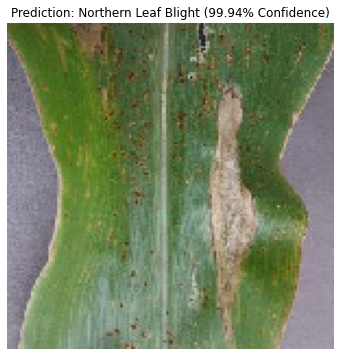

In [15]:
plt.figure(figsize=(25, 6))
img1 = tf.keras.preprocessing.image.load_img('1f36d729-d193-4824-a159-a6085f2b7159___RS_NLB 3741.JPG', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255
pred = model.predict(np.expand_dims(img1, axis=0))
plt.imshow(img1)
plt.axis('off')
plt.title(f"Prediction: {class_name[np.argmax(pred)]} ({np.max(pred) * 100:.2f}% Confidence)")
plt.show()

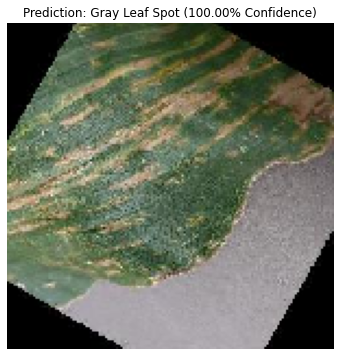

In [16]:
plt.figure(figsize=(25, 6))
img1 = tf.keras.preprocessing.image.load_img('grey.JPG', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255
pred = model.predict(np.expand_dims(img1, axis=0))
plt.imshow(img1)
plt.axis('off')
plt.title(f"Prediction: {class_name[np.argmax(pred)]} ({np.max(pred) * 100:.2f}% Confidence)")
plt.show()

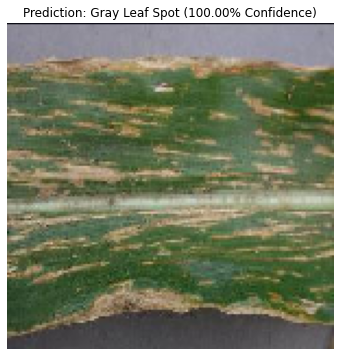

In [17]:
plt.figure(figsize=(25, 6))
img1 = tf.keras.preprocessing.image.load_img('grey2.JPG', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255
pred = model.predict(np.expand_dims(img1, axis=0))
plt.imshow(img1)
plt.axis('off')
plt.title(f"Prediction: {class_name[np.argmax(pred)]} ({np.max(pred) * 100:.2f}% Confidence)")
plt.show()